<a href="https://colab.research.google.com/github/sera0911/Dacon/blob/main/asia_ai_project/3rd_mini_project/%EB%94%B0%EB%A6%89%EC%9D%B4_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**기초 셋팅 : 그래프 한글 폰트 & 오류 문구 제거**

In [ ]:
import numpy as np

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (15,6)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

np.random.seed(42)
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


**데이터 설명**

1. 날씨 & 미세먼지 데이터 통합
2. 따릉이 대여소 & 따릉이 대여 데이터 통합

따릉이 데이터는 25개의 자치구, 시간을 0-6, 7-12, 13-18, 19-24로 4가지로 나누어 해석


1 날씨(온도, 풍량)에 맞춰서 따릉이 이용량 예측

2 대여소 이용 건수에 따라 군집화 및 미래 예측





**EDA**

In [ ]:
# 파일 불러오기
ride_count = pd.read_csv('/content/drive/MyDrive/projects/3차-따릉이/data/ride_count.csv')
weather = pd.read_csv('/content/drive/MyDrive/projects/3차-따릉이/data/weather.csv')
data = pd.read_csv('/content/drive/MyDrive/projects/3차-따릉이/data/data_raw.csv')

In [ ]:
data['자치구'].unique().shape

(25,)

In [ ]:
data

,자치구,일자,시각,기온,풍속,강수량,미세먼지농도,이용건수
0,강남구,2020-01-01,0,-5.1,1.0,0.0,27.0,24
1,강남구,2020-01-01,1,-5.0,0.8,0.0,20.0,29
2,강남구,2020-01-01,2,-4.8,1.3,0.0,21.0,28
3,강남구,2020-01-01,3,-4.9,0.7,0.0,31.0,21
4,강남구,2020-01-01,4,-4.7,1.4,0.0,30.0,14
...,...,...,...,...,...,...,...,...
216253,동작구,2020-12-31,19,-5.4,1.7,0.0,44.0,33
216254,동작구,2020-12-31,20,-6.5,1.5,0.0,35.0,30
216255,동작구,2020-12-31,21,-6.2,1.4,0.0,42.0,24
216256,동작구,2020-12-31,22,-5.6,1.6,0.0,42.0,7


In [ ]:
data.info()  #컬럼 8개 데이터 198970개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216258 entries, 0 to 216257
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   자치구     216258 non-null  object 
 1   일자      216258 non-null  object 
 2   시각      216258 non-null  int64  
 3   기온      216258 non-null  float64
 4   풍속      216258 non-null  float64
 5   강수량     216258 non-null  float64
 6   미세먼지농도  216258 non-null  float64
 7   이용건수    216258 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 13.2+ MB


자치구별 이용건수 파악

In [ ]:
place = data['이용건수'].groupby(data['자치구'])
place = place.sum()
print(place)
place = pd.DataFrame(place).reset_index()

자치구
강남구      767334
강동구      862998
강북구      453917
강서구     1931607
관악구      795793
광진구     1142316
구로구      905876
금천구      399291
노원구     1252161
도봉구      468275
동대문구     826526
동작구      591782
마포구     1471226
서대문구     618817
서초구      905074
성동구     1081177
성북구      734574
송파구     1740978
양천구     1023888
영등포구    1888253
용산구      513760
은평구      673835
종로구      836463
중구       507315
중랑구      660231
Name: 이용건수, dtype: int64


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

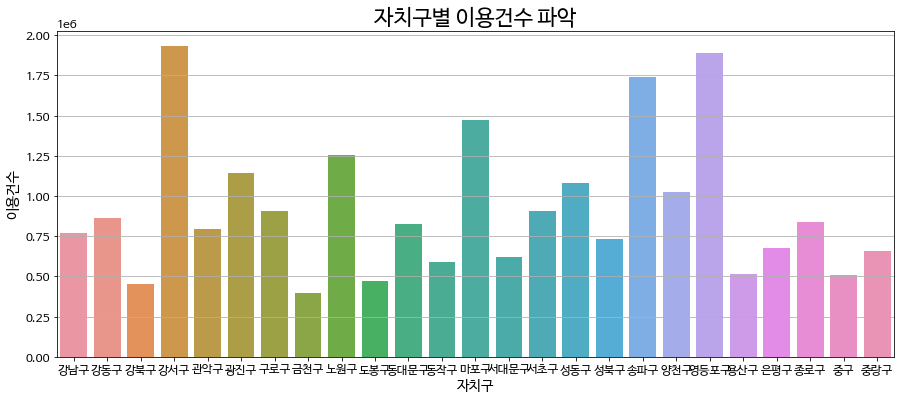

In [ ]:
ax = plt.subplots() 
ax = sns.barplot(x = place['자치구'], y=place['이용건수']).set_title('자치구별 이용건수 파악')

시간대별 이용건수 파악

In [ ]:
time = data['이용건수'].groupby(data['시각'])
time = time.sum()

time = pd.DataFrame(time).reset_index()
print(time)

    시각     이용건수
0    0   643010
1    1   490435
2    2   335975
3    3   229294
4    4   156005
5    5   162835
6    6   312892
7    7   748150
8    8  1225987
9    9   779686
10  10   679182
11  11   822067
12  12   968813
13  13  1057480
14  14  1163827
15  15  1293862
16  16  1476518
17  17  1893578
18  18  2208161
19  19  1656753
20  20  1468970
21  21  1357422
22  22  1127325
23  23   795240


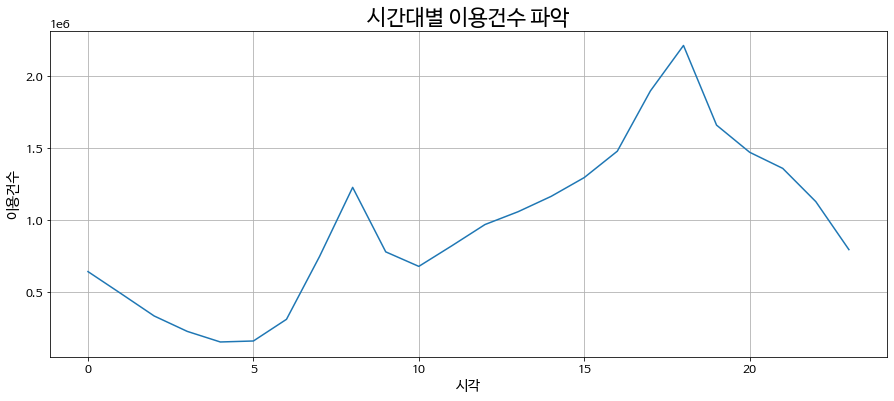

In [ ]:
ax = plt.subplots() 
ax = sns.lineplot(x = time['시각'], y=time['이용건수']).set_title('시간대별 이용건수 파악')

온도에 따른 이용건수 파악

In [ ]:
temp = pd.cut(data['기온'], bins=[-np.inf,-10, -5, 0, 5, 10, 15, 20, 25, 30, np.inf], labels=['-10도 이상 영하', '-9~-5도 영하', '-4~0도', '0~5도', '6~10도',
                                                                                          '11~15도', '16~20도', '21~25도', '26~30도', '30도 이상'], right=False)
temp = pd.DataFrame(temp)
temp['이용건수'] = data['이용건수']
temp

,기온,이용건수
0,-9~-5도 영하,24
1,-4~0도,29
2,-4~0도,28
3,-4~0도,21
4,-4~0도,14
...,...,...
216253,-9~-5도 영하,33
216254,-9~-5도 영하,30
216255,-9~-5도 영하,24
216256,-9~-5도 영하,7


In [ ]:
temp = temp['이용건수'].groupby(temp['기온'])
temp = temp.sum()

temp = pd.DataFrame(temp).reset_index()
print(temp)

           기온     이용건수
0  -10도 이상 영하    30342
1   -9~-5도 영하   170800
2       -4~0도   581486
3        0~5도  1695420
4       6~10도  2484349
5      11~15도  3305984
6      16~20도  4212160
7      21~25도  5623065
8      26~30도  4248260
9      30도 이상   701601


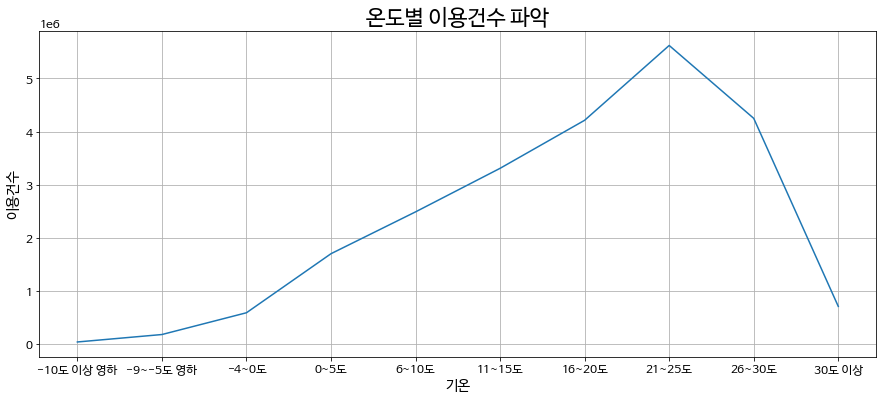

In [ ]:
ax = plt.subplots() 
ax = sns.lineplot(x = temp['기온'], y=temp['이용건수']).set_title('온도별 이용건수 파악')

강수량에 따른 이용건수 파악

In [ ]:
rain = pd.cut(data['강수량'], bins=[-np.inf, 0, 10, np.inf], labels=['x','△','o'], right=True)
rain = pd.DataFrame(rain)
rain['이용건수'] = data['이용건수']
rain

,강수량,이용건수
0,x,24
1,x,29
2,x,28
3,x,21
4,x,14
...,...,...
216253,x,33
216254,x,30
216255,x,24
216256,x,7


In [ ]:
rain = rain['이용건수'].groupby(rain['강수량'])
rain = rain.sum()

rain = pd.DataFrame(rain).reset_index()
print(rain)

  강수량      이용건수
0   x  22829298
1   △    216064
2   o      8105


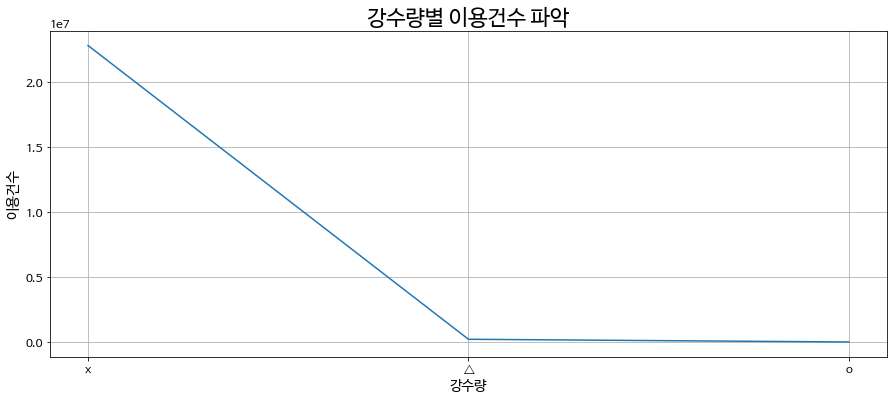

In [ ]:
ax = plt.subplots() 
ax = sns.lineplot(x = rain['강수량'], y=rain['이용건수']).set_title('강수량별 이용건수 파악')

풍속에 따른 이용건수 파악

In [ ]:
wind = pd.cut(data['풍속'], bins=[0, 1, 3, 6, 9, np.inf], labels=['고요한 상태','미풍', '연풍', '화풍', '강풍'], right=False)
wind = pd.DataFrame(wind)
wind['이용건수'] = data['이용건수']
wind

,풍속,이용건수
0,미풍,24
1,고요한 상태,29
2,미풍,28
3,고요한 상태,21
4,미풍,14
...,...,...
216253,미풍,33
216254,미풍,30
216255,미풍,24
216256,미풍,7


In [ ]:
wind = wind['이용건수'].groupby(wind['풍속'])
wind = wind.sum()

wind = pd.DataFrame(wind).reset_index()
print(wind)

       풍속      이용건수
0  고요한 상태   5815795
1      미풍  14407120
2      연풍   2766739
3      화풍     63541
4      강풍       272


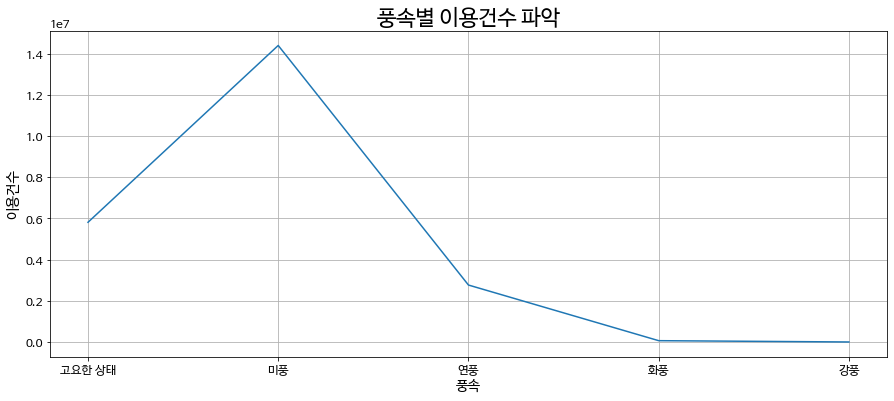

In [ ]:
ax = plt.subplots() 
ax = sns.lineplot(x = wind['풍속'], y=wind['이용건수']).set_title('풍속별 이용건수 파악')

미세먼지농도에 따른 이용건수 파악

In [ ]:
mise = pd.cut(data['미세먼지농도'], bins=[0, 30, 80, 150, np.inf], labels=['좋음','보통', '나쁨', '매우 나쁨'], right=False)
mise = pd.DataFrame(mise)
mise['이용건수'] = data['이용건수']
mise

,미세먼지농도,이용건수
0,좋음,24
1,좋음,29
2,좋음,28
3,보통,21
4,보통,14
...,...,...
216253,보통,33
216254,보통,30
216255,보통,24
216256,보통,7


In [ ]:
mise = mise['이용건수'].groupby(mise['미세먼지농도'])
mise = mise.sum()

mise = pd.DataFrame(mise).reset_index()
print(mise)

  미세먼지농도      이용건수
0     좋음   6611684
1     보통  14382399
2     나쁨   1874008
3  매우 나쁨    185376


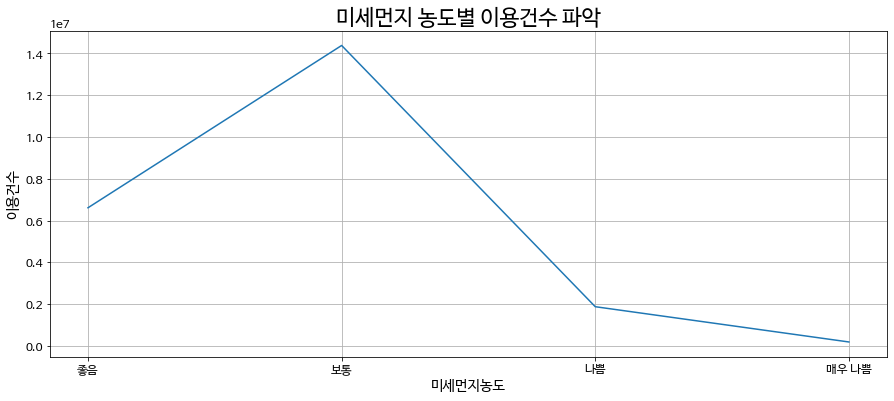

In [ ]:
ax = plt.subplots() 
ax = sns.lineplot(x = mise['미세먼지농도'], y=mise['이용건수']).set_title('미세먼지 농도별 이용건수 파악')

계절에 따른

In [ ]:
season = pd.cut(data['일자'], bins=[2020-01-01, 2020-02-31, 2020-05-31, 2020-08-31, 2020-11-30, np.inf], labels=['겨울','봄', '여름', '가을', '겨울'], right=False)
mise = pd.DataFrame(mise)
mise['이용건수'] = data['이용건수']
mise

SyntaxError: ignored

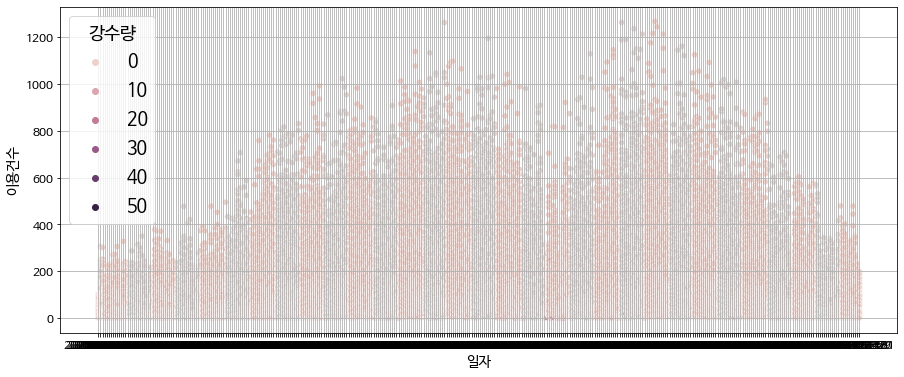

In [ ]:
sns.scatterplot(x="일자", y="이용건수",hue='강수량', data=data)

plt.show()

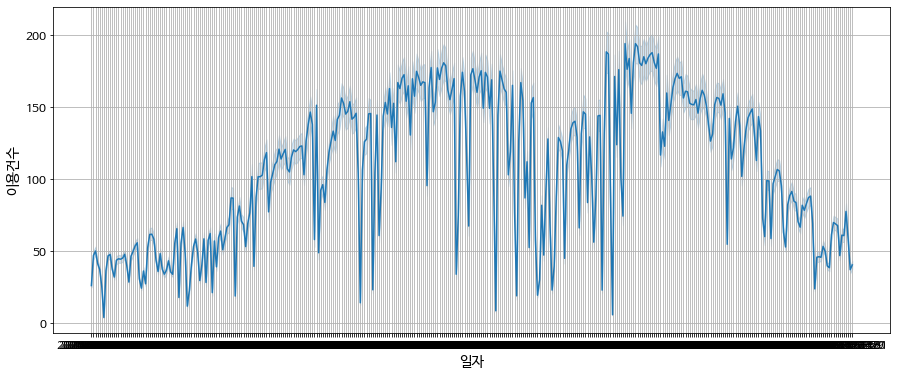

In [ ]:
sns.lineplot(x="일자", y="이용건수", data=data)

plt.show()